In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data, Clean and Save new datasets

In [105]:
df = pd.read_csv("data/sportaanbieders.csv")
df.head(5)

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y
0,Aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,"4,84440832","52,37074001"
1,Aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,"4,95984695","52,40025203"
2,Aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,"4,95984695","52,40025203"
3,Aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,"4,99323066","52,31425676"
4,Aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,"4,86684929","52,36037903"


### Translate Dutch Sport name to English

In [1]:
def translate_text(text):
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    import six
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, six.binary_type):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language="en")

#     print(u"Text: {}".format(result["input"]))
#     print(u"Translation: {}".format(result["translatedText"]))
#     print(u"Detected source language: {}".format(result["detectedSourceLanguage"]))
    return result["translatedText"]


In [106]:
#################
## Clean ########
#################
df.Sport=df.Sport.apply(lambda x: x.lower().strip())


##############################
### Check english translation
##############################

nl_en={}
for s_type in sport_types:
    nl_en[s_type] = translate_text(s_type)



# ##############################
# ## correct some mis-translation
# ##############################

nl_en["zeilen"]="sailing"
nl_en["dans"]="dance"
nl_en["padel"] = "padel"

###############################
## Save Translation to pickle
###############################
# import pickle
# with open("data/sports_translation.pickle", "wb") as f:
#     pickle.dump(nl_en, f)

#### Add translated name to df
df.loc[:, "Sport_en"] = df.Sport.map(nl_en)

### Filter Out Sports Providers outside Amsterdam

In [7]:
###############
# Geo geojson
###############
import json

with open("../geojson.json") as f:
    districts = json.load(f)

district_code = {}
for d in districts["features"]:
    district_code[d["properties"]["Stadsdeel"]]=d["properties"]["Stadsdeel_code"]

df.loc[:, "Stadsdeel"] = df.Stadsdeel.str.replace("Zuid-Oost","Zuidoost")
df.loc[:, "district_code"] = df.Stadsdeel.map(district_code)

### Filter out all providers outside amsterdam
df = df[~df["district_code"].isna()]

### save csv to csv
# df.to_csv("../data/sports_provider_Amsterdam.csv", index=False)

### Aggregate Same Sport with Different Names

In [21]:
sports_lst = df.Sport_en.unique().tolist()
len(sports_lst)

86

In [40]:
## Correct some translation
df.loc[df["Sport_en"] == "the box", "Sport_en"] = "boxing"

df.loc[df["Sport_en"] == "street dance", "Sport_en"]="dance"

for sport in df.Sport_en.unique().tolist():
    if "skat" in sport:
        df.loc[df["Sport_en"] == sport, "Sport_en"] = "skating"

df.loc[df["Sport_en"] == "diving", "Sport_en"]="underwater sports"

for sport in df.Sport_en.unique().tolist():
    if "fit" in sport:
        df.loc[df["Sport_en"] == sport, "Sport_en"] = "fitness"

df.loc[df["Sport_en"] == "mountain sports", "Sport_en"]="climbing"
df.loc[df["Sport_en"] == "klimsport", "Sport_en"]="climbing"
df.loc[df.Sport_en == 'lawn bowling', "Sport_en"] ="bowls"
df.loc[df.Sport_en == "screens", "Sport_en"] = "fencing"

# ## save csv to csv
# df.to_csv("../data/sports_provider_Amsterdam.csv", index=False)

## Explore dataset

In [49]:
df=pd.read_csv("../data/sports_provider_Amsterdam.csv")
df.head()

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y,Sport_en,district_code
0,aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,4.844408,52.370740,adapted sports,F
1,aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,4.959847,52.400252,adapted sports,N
2,aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,4.959847,52.400252,adapted sports,N
3,aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,4.993231,52.314257,adapted sports,T
4,aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,4.866849,52.360379,adapted sports,E


### Sport type

In [3]:
################
### Size #######
################
display(df.shape)

sports_lst = df.Sport_en.unique().tolist()
display(len(sports_lst))

(967, 15)

80

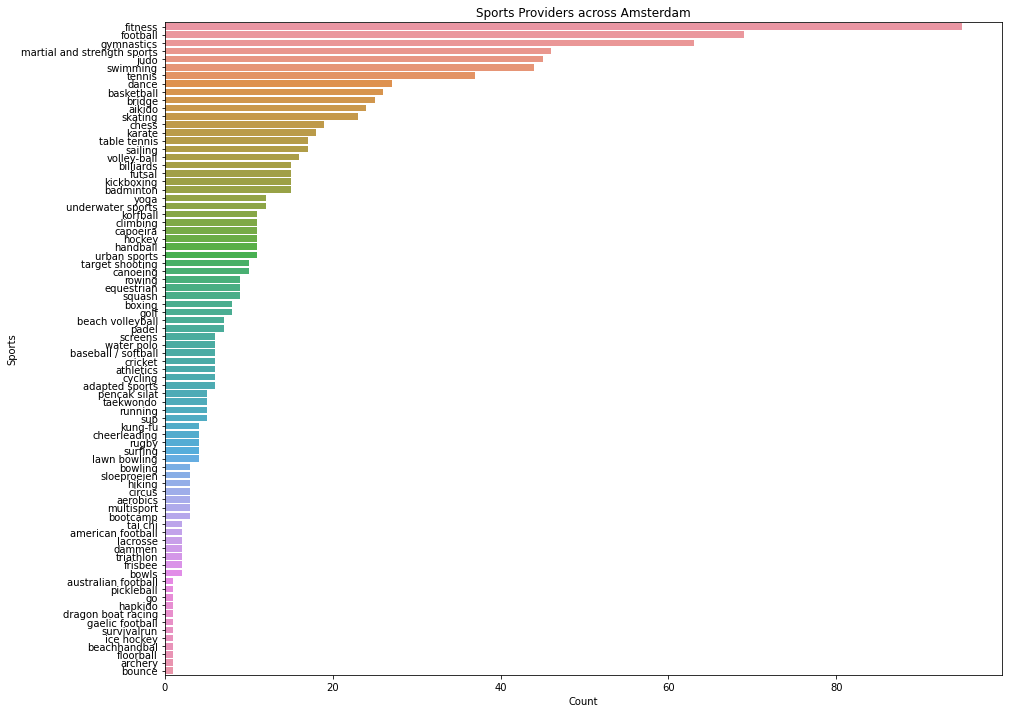

In [7]:
plt.figure(figsize=(15,12))
sns.countplot(y="Sport_en", 
              data=df,
              order = df['Sport_en'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Sports")
plt.title("Sports Providers across Amsterdam")
plt.savefig("../plots/Sports_Count.png")

In [17]:
count_df = pd.DataFrame(df.groupby("Sport_en").count()["Sport"]).reset_index()
count_df = count_df.rename(columns={"Sport":"Count"})
count_df.sort_values(by="Count", ascending=False)

count_df["Count"].nunique()

29

In [46]:
count_df = count_df.sort_values(by="Count",ascending=True)

In [48]:
count_df.shape

(80, 2)

## Treemap

In [50]:
df.head()

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y,Sport_en,district_code
0,aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,4.844408,52.370740,adapted sports,F
1,aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,4.959847,52.400252,adapted sports,N
2,aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,4.959847,52.400252,adapted sports,N
3,aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,4.993231,52.314257,adapted sports,T
4,aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,4.866849,52.360379,adapted sports,E


In [68]:
df.loc[:,"Count"] = 1
df.head()

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y,Sport_en,district_code,Count
0,aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,4.844408,52.370740,adapted sports,F,1
1,aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,4.959847,52.400252,adapted sports,N,1
2,aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,4.959847,52.400252,adapted sports,N,1
3,aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,4.993231,52.314257,adapted sports,T,1
4,aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,4.866849,52.360379,adapted sports,E,1


In [75]:
import plotly.express as px
fig = px.treemap(df, 
                 color="Sport_en",
                 path = ["Stadsdeel", "Sport_en"],
                 color_continuous_scale="RdBu"
                 )
fig.show()

In [197]:
fig = px.treemap(df, 
                 path = ["Sport_en"],
                )
fig.show()


In [198]:
fig.write_html("../plots/all_sports.html")

In [74]:

fig = px.treemap(df, 
                 path = ["Sport_en", "Stadsdeel"],
                 range_color="pinks",
                 maxdepth=1)
fig.show()

### Categorization

In [201]:
fig = px.treemap(df, 
                 path = ["All", "Sub_Cat", "Sport_en"]
                 )
fig.show()

In [196]:
fig.write_html("../plots/sports_subcat.html")

### update-layout

- [ ] unify fontsize and only show certain
- [ ] infotext template
- [ ] havor info format

In [2]:
df = pd.read_csv("../data/sports_provider_Amsterdam.csv")
df.head()

,Sport,Naam,Website,Naam accommodatie,Adres accommodatie,Postcode accommodatie,Plaats accommodatie,Stadsdeel,Aangepast sporten,KvK,Stadspas,x,y,Sport_en,district_code,Count,Meta_Cat,Sub_Cat,All
0,aangepast sporten,Reade,www.reade.nl,Jan van Breemen instituut,Admiraal Helfrichstraat 1,1056AA,Amsterdam,Nieuw-West,ja,NaN,NaN,4.844408,52.370740,adapted sports,F,1,physical sports,others,All
1,aangepast sporten,Friendship Sports Centre,www.friendshipsportscentre.nl,Friendship Sports Centre,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,34152839.0,NaN,4.959847,52.400252,adapted sports,N,1,physical sports,others,All
2,aangepast sporten,Only Friends,www.onlyfriends.nl,Sportpark De Weeren,Beemsterstraat 652,1027ED,Amsterdam,Noord,ja,50538063.0,ja,4.959847,52.400252,adapted sports,N,1,physical sports,others,All
3,aangepast sporten,PWA Manege | Vereniging Paardrijden Gehandicapten,www.pwamanege.nl,Prins Willem-Alexander manege,Loosdrechtdreef 9,1108AZ,Amsterdam,Zuidoost,ja,40533448.0,NaN,4.993231,52.314257,adapted sports,T,1,physical sports,others,All
4,aangepast sporten,Terminators,www.amsterdamterminators.nl,Reade sporthal,Overtoom 283,1054HW,Amsterdam,West,ja,40539513.0,NaN,4.866849,52.360379,adapted sports,E,1,physical sports,others,All


- [ ] change color theme
    - Continous color vs. discrete

> - **Available color scales:**
aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     turbo
viridis     ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep
dense       gray        haline      ice         matter      solar       speed       tempo
thermal     turbid      armyrose    brbg        earth       fall        geyser      prgn
piyg        picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral
tealrose    temps       tropic      balance     curl        delta       oxy         edge
hsv         icefire     phase       twilight    mrybm       mygbm


In [5]:
num = df.groupby(by="Sport_en").count()["Naam"]
df.loc[:, "Sport_count"] = df.Sport_en.map(num)

In [227]:
import plotly.express as px
import plotly.graph_objects as go

import numpy as np

sport_template = dict(
    layout = go.Layout(font=dict(
                            family="Old Standard TT",
                            ),
                       paper_bgcolor="white",
                       hoverlabel=dict(
                                   bordercolor="black",
                                   bgcolor ="white",
                                   font_size=15,
                                   font_family="Rockwell"),

                       title=dict(xanchor="center",
                                  yanchor="top",
                                  yref="paper",
                                  font_size=24),
                       coloraxis_colorbar=dict(
                                  outlinewidth = 0)
                      ))


fig = px.treemap(df,
                 path = ["All", "Sport_en"],
                 color = "Sport_count",
                 color_continuous_scale="curl",
#                  color_continuous_scale="earth",
                 range_color = [1, 75],
                 hover_name = "Sport_en",
                 color_continuous_midpoint=np.average(df["Sport_count"]),
                 maxdepth=3
                )

fig.update_traces(go.Treemap(
    textinfo = "label",
    texttemplate = "%{label}<br><br>Count: %{value}<br>Percentage: %{percentParent:.1%}",
    hovertemplate = "  %{label}  ",
    outsidetextfont = {"size": 20, "color": "darkblue"},
#     hovertemplate = "%{label}"
)
                 )

fig.update_layout(
    title = dict(
        text = "Different Kinds of Sport"),
    coloraxis_colorbar=dict(
        title="Counts",
        tickvals=[10,30, 50, 70]),
#     uniformtext = dict(minsize=10,
#                       mode="hide"),
    template=sport_template,
    height=600
)

fig.show()
                        
    

In [139]:
num = df.groupby(by=["Stadsdeel","Sport_en"]).count()["Naam"]
# df.loc[:, "Sport_count"] = df.Sport_en.map(num)

In [148]:
num = pd.DataFrame(num).reset_index().rename(columns={"Naam":"sport_count_in_district"})
num.head()

,Stadsdeel,Sport_en,sport_count_in_district
0,Centrum,adapted sports,1
1,Centrum,aikido,1
2,Centrum,bowling,1
3,Centrum,boxing,1
4,Centrum,bridge,3


In [150]:
df = df.merge(num, how="left")

> - **Available color scales:**
aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     turbo
viridis     ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep
dense       gray        haline      ice         matter      solar       speed       tempo
thermal     turbid      armyrose    brbg        earth       fall        geyser      prgn
piyg        picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral
tealrose    temps       tropic      balance     curl        delta       oxy         edge
hsv         icefire     phase       twilight    mrybm       mygbm


In [228]:
import plotly.express as px
import plotly.graph_objects as go

import numpy as np

sport_template = dict(
    layout = go.Layout(font=dict(
                            family="Old Standard TT",
                            ),
                       paper_bgcolor="white",
                       margin=dict(l=0, t=100, b=0, r=0,pad=100),
                       hoverlabel=dict(
                                   bordercolor="black",
                                   bgcolor ="white",
#                                    font_size=15,
                                   font_family="Rockwell"),
                       title=dict(xanchor="center",
                                  yanchor="top",
                                  yref="container",
                                  font_size=24),
                       coloraxis_colorbar=dict(
                                  outlinewidth = 0)
                      ))


fig = px.treemap(df,
                 path = ["All", 'Stadsdeel',"Sport_en"],
                 color = "sport_count_in_district",
                 color_continuous_scale="brwnyl",
#                  color_continuous_scale="earth",
                 range_color = [1, 22],
                 hover_name = "Sport_en",
                 color_continuous_midpoint=np.average(df["sport_count_in_district"]),
                 maxdepth=3
                )

fig.update_traces(go.Treemap(
    textinfo = "label",
    hovertemplate = "%{label}<br>Count: %{value}",
    outsidetextfont = {"size": 20, "color": "darkblue"},
#     hovertemplate = "%{label}"
)
                 )

fig.update_layout(
    title = dict(
        text = "Different Kinds of Sport<br>(Click Area to Expand)",
        pad=dict(b=100)),
    coloraxis_colorbar=dict(
        title="Counts",
    ),
    margin=dict(l=20, t=100),

    template=sport_template,
    height=600
)

fig.show()
                        
    

In [224]:
df["Sport_en"] = df["Sport_en"].map(lambda x: " ".join(w.capitalize() for w in x.split()))

In [183]:
df.All = "All Sports"

In [185]:
df["Sport"] = df["Sport"].map(lambda x: " ".join(w.capitalize() for w in x.split()))

In [187]:
df.to_csv("../data/sports_provider_Amsterdam.csv", index = False)

### District

In [38]:
df.Stadsdeel.unique()

array(['Nieuw-West', 'Noord', 'Zuidoost', 'West', 'Buiten Amsterdam',
       'Centrum', 'Oost', 'Zuid', 'Westpoort', 'Diemen', 'Zuid-Oost'],
      dtype=object)

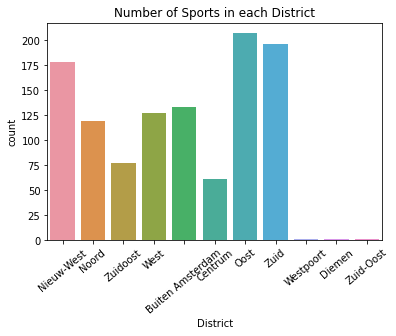

In [58]:
sns.countplot(data=df, x="Stadsdeel")
plt.xlabel("District")
plt.xticks(rotation=40)
plt.title("Number of Sports in each District")
plt.savefig("plots/amount_in_district.png")